In [2]:
import sys
import os
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

#from utils import read_mtx
from plot import plot_embedding, plot_clustercounts

%matplotlib inline


In [17]:
tme=pd.read_csv('data/TME-All/GSE129785_scATAC-TME-All.cell_barcodes.txt.gz',sep='\t',header=0, index_col=-1)

In [34]:
cluster_anno=pd.read_csv('data/TME-All/TME-All_cluster.txt', sep='\t', header=None, index_col=0)
cluster_anno=cluster_anno[1].to_dict()
tme['ClusterName']=tme.apply(lambda x: cluster_anno[x['Clusters']], axis=1)

In [84]:
tme.index=tme['Internal_Name']

In [106]:
tme.head()

,UMAP1,UMAP2,Clusters,Group,depth,FRIP,Barcodes,Internal_Name,ClusterName,Patient
Internal_Name,,,,,,,,,,
SU001_Tcell_Post_133,-5.069238,2.901523,Cluster7,SU001_Tcell_Post,5269,0.546973,TATTGCTTCGGATCGC-1,SU001_Tcell_Post_133,7-Memory CD8 T,SU001
SU001_Tcell_Post_134,-6.911177,-0.641451,Cluster8,SU001_Tcell_Post,7922,0.688147,TGCACCTTCTGGCGCA-1,SU001_Tcell_Post_134,8-CD8 TEx,SU001
SU001_Tcell_Post_138,-8.342639,-4.682566,Cluster8,SU001_Tcell_Post,12625,0.697584,ACAGCGCTCTATACCT-1,SU001_Tcell_Post_138,8-CD8 TEx,SU001
SU001_Tcell_Post_139,-4.587214,3.456622,Cluster7,SU001_Tcell_Post,9814,0.693499,GTGATCATCGCTCTAC-1,SU001_Tcell_Post_139,7-Memory CD8 T,SU001
SU001_Tcell_Post_140,-7.780084,-3.592078,Cluster8,SU001_Tcell_Post,27605,0.660062,GGTACCGGTACAAATG-1,SU001_Tcell_Post_140,8-CD8 TEx,SU001


# Cluster

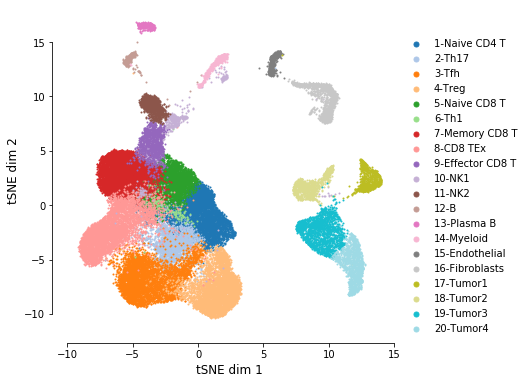

In [25]:
plot_embedding(np.array(tme[['UMAP1','UMAP2']]), tme['ClusterName'], classes=cluster_anno.values(),
               #cmap='nipy_spectral',
               figsize=(6,6),markersize=1)

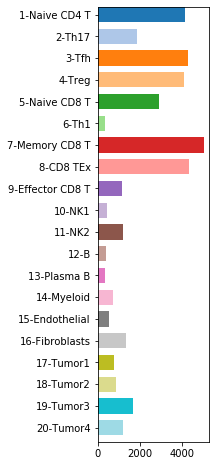

In [51]:
from plot import plot_clustercounts
cluster_counts=tme['ClusterName'].value_counts()
cluster_counts=cluster_counts.loc[cluster_anno.values()]
plot_clustercounts(cluster_counts,clusters=list(cluster_anno.values()), 
                   cmap='tab20',width=0.7,figsize=(2,8),yticks=True)

In [28]:
tme['Patient']=tme.apply(lambda x: x['Group'].split('_')[0], axis=1)

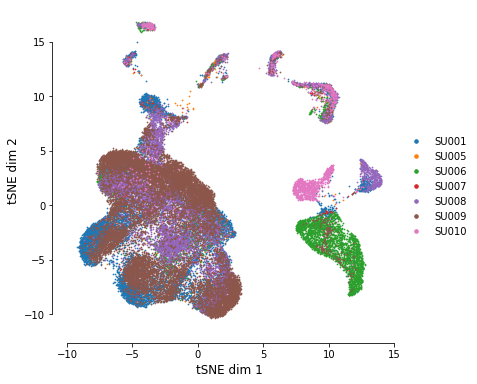

In [50]:
plot_embedding(np.array(tme[['UMAP1','UMAP2']]), tme['Patient'], 
               classes=['SU001','SU005','SU006','SU007','SU008','SU009','SU010'],
               cmap='tab10',
               figsize=(6,6),markersize=0.5)

# GA

In [66]:
ga = pd.read_csv('data/TME-All/gene_activity_cicero_ga.txt', sep='\s', header=0, index_col=0)
ga.columns=[el.strip('"') for el in ga.columns]
ga.index=[el.strip('"') for el in ga.index]

/home/xionglei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [78]:
adata = sc.AnnData(ga.T)
adata.obs_names=ga.columns
adata.var_names=ga.index

In [85]:
#ga=adata
ga.obsm['X_umap']=np.array(tme[['UMAP1','UMAP2']].loc[ga.obs_names,])
ga.obs=tme.loc[ga.obs_names,]

In [87]:
ga

AnnData object with n_obs × n_vars = 37818 × 18993 
    obs: 'UMAP1', 'UMAP2', 'Clusters', 'Group', 'depth', 'FRIP', 'Barcodes', 'Internal_Name', 'ClusterName', 'Patient'
    obsm: 'X_umap'

In [88]:
ga.write_h5ad('result/TME-All/ga.h5ad')

... storing 'Clusters' as categorical
... storing 'Group' as categorical
... storing 'Barcodes' as categorical
... storing 'ClusterName' as categorical
... storing 'Patient' as categorical


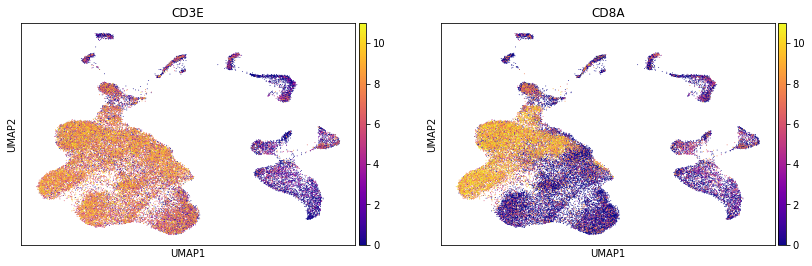

In [90]:
sc.pl.umap(ga, color=['CD3E','CD8A'],color_map='plasma', vmax=11)

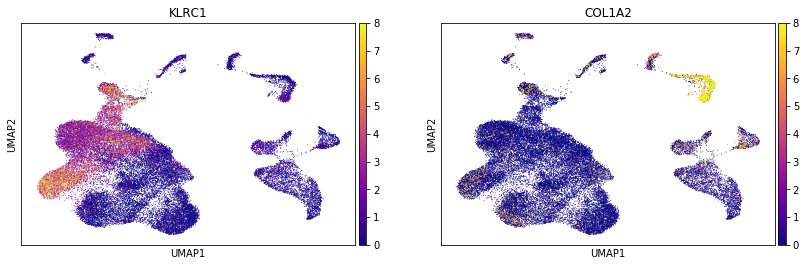

In [91]:
sc.pl.umap(ga, color=['KLRC1','COL1A2'],color_map='plasma', vmax=8)

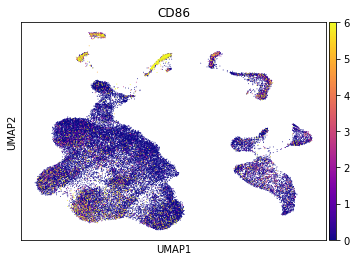

In [92]:
sc.pl.umap(ga, color=['CD86'],color_map='plasma', vmax=6)

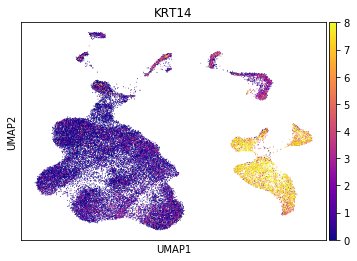

In [93]:
sc.pl.umap(ga, color=['KRT14'],color_map='plasma', vmax=8)

# TF

In [98]:
from plot import plot_heatmap

In [94]:
tf = pd.read_csv('data/TME-All/tf_deviations.txt', sep='\s', header=0, index_col=0)
tf.columns=[el.strip('"') for el in tf.columns]
tf.index=[el.strip('"') for el in tf.index]

/home/xionglei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [95]:
tf.iloc[:5,:5]

,SU001_Tcell_Post_133,SU001_Tcell_Post_134,SU001_Tcell_Post_138,SU001_Tcell_Post_139,SU001_Tcell_Post_140
TFAP2B_1,-0.060259,-0.026884,0.045894,-0.029632,0.009221
TFAP2B_2,0.002804,-0.000562,-0.014077,-0.033222,-0.030597
TFAP2B_3,-0.039825,-0.001072,0.011091,0.048595,0.004837
TFAP2B_4,0.000387,0.006989,0.024245,-0.012026,-0.009999
TFAP2D_5,0.031150,0.010058,-0.004420,-0.007494,-0.002447


In [ ]:
X=tf
X.columns=tme.loc[tf.columns,'ClusterName']
X_group=X.T
X_group['clusters']=X_group.index
X_group=X_group.groupby('clusters').mean().T
y_cluster=np.array([el.split('-')[0] for el in X_group.columns])

In [101]:
y_cluster

array(['7', '8', '8', ..., '9', '9', '1'], dtype='<U2')

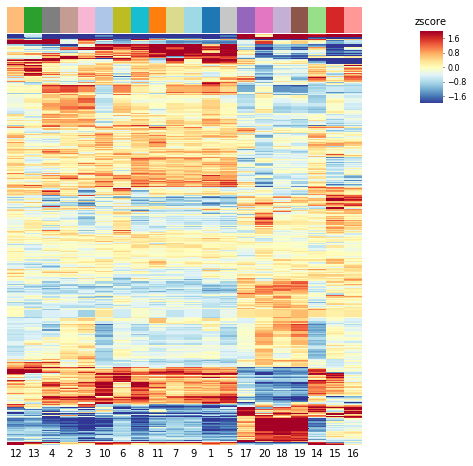

In [116]:
#col_colors=sns.color_palette('tab20', n_colors=X2.shape[1])

plot_heatmap(X2, y=X2.columns, ncol=3, vmax=2, vmin=-2,
             row_cluster=True, col_cluster=True, 
             z_score=1, cmap='RdYlBu_r',
             colormap=col_colors,
            legend_font=6, cax_title='zscore',show_legend=False,
            figsize=(8, 10), bbox_to_anchor=(0.4, 1.2), position=(1, 0.6, .04, .1), 
             save=None)

In [115]:
def sort_by_classes(X, y, classes):
    if classes is None:
        classes = np.unique(y)
    index = []
    for c in classes:
        ind = np.where(y==c)[0]
        index.append(ind)
    index = np.concatenate(index)
    X = X.iloc[:, index]
    y = y[index]
    return X, y, classes, index

# CNV

In [43]:
from plot import plot_heatmap

In [35]:
tme.head(2)

,UMAP1,UMAP2,Clusters,Group,depth,FRIP,Barcodes,Internal_Name,ClusterName
Group_Barcode,,,,,,,,,
SU001_Tcell_Post#TATTGCTTCGGATCGC-1,-5.069238,2.901523,Cluster7,SU001_Tcell_Post,5269,0.546973,TATTGCTTCGGATCGC-1,SU001_Tcell_Post_133,7-Memory CD8 T
SU001_Tcell_Post#TGCACCTTCTGGCGCA-1,-6.911177,-0.641451,Cluster8,SU001_Tcell_Post,7922,0.688147,TGCACCTTCTGGCGCA-1,SU001_Tcell_Post_134,8-CD8 TEx


In [38]:
filtered=tme[tme['Group']=='SU010_Total_Pre']
filtered_cells=filtered['Barcodes']

In [39]:
# sort by stromal cell and tumor cells

ST=[]
tumor_clusters=['Cluster17','Cluster18','Cluster19','Cluster20']
for el in filtered['Clusters']:
    if el not in tumor_clusters:
        ST.append('Stromal')
    else:
        ST.append('Tumor')

filtered['S_T']=ST
filtered_s=filtered.sort_values('S_T')

/home/xionglei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [15]:
# read cnv
zscore=pd.read_csv('result/TME-All/CNA_chr3-6/CNA_z.txt',sep='\t')

In [51]:
zf=zscore[list(filtered_s['Barcodes'])]

In [24]:
zf.shape

(274, 1071)

In [61]:
zf.to_csv('result/TME-All/CNA_chr3-6/z_filtered.txt',sep='\t', index=True)

In [62]:
zf.iloc[:3,:3]

,GATGGCCGTGCTTACA-1,GGTAGGACAAGCACTT-1,CAGGATTGTCTGCGCA-1
name,,,
w239,0.684525,0.654311,-0.635026
w240,1.356956,0.313521,-0.202111
w241,1.513414,0.714374,0.217634


In [12]:
# get window pos
wind = pd.read_csv('result/TME-All/CNA_chr3-6/windows.txt', sep='\t')
wind.index=wind['name']
wind = wind.loc[~wind.index.duplicated(keep='first')]
wind_dict = wind['seqnames'].to_dict()

In [26]:
cna_wind = pd.read_csv('result/TME-All/CNA_chr3-6/CNA_window.txt', sep='\t')
zf.index=cna_wind['name']

In [33]:
zf_chr=[wind_dict[el] for el in zf.index]

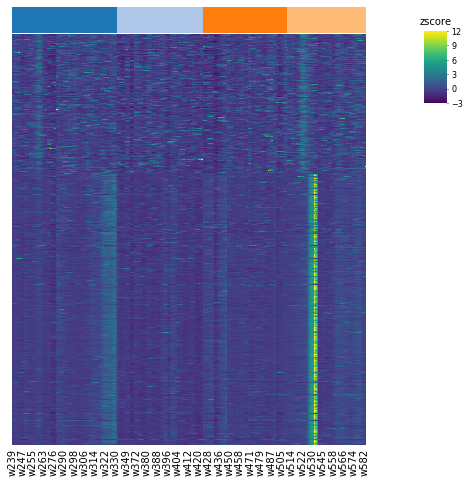

In [59]:
plot_heatmap(zf.T, y=np.array(zf_chr), ncol=3, vmax=12, #vmin=-2,
             row_cluster=False, col_cluster=False, 
             #z_score=0, 
             #cmap='RdYlBu_r',
             cmap='viridis',
             #colormap=col_colors,
            legend_font=6, cax_title='zscore',show_legend=False,
            figsize=(8, 10), bbox_to_anchor=(0.4, 1.2), position=(1, 0.6, .04, .1), 
             save=None)